In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML

In [2]:
traindata = pd.read_csv("hr-total-cat-unbalanced.csv",index_col=0)

In [3]:
Y = traindata['is_promoted'].values
X_traindata = traindata.drop('is_promoted', axis=1)
X = X_traindata.values

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier

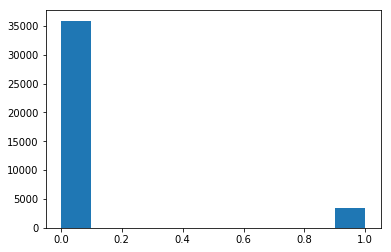

In [11]:
plt.hist(Y_train)
plt.show()

In [12]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

In [13]:
class_weights = class_weight.compute_class_weight('balanced',np.unique(Y_train),Y_train)
class_weightsl = class_weights.tolist()
class_weightsl

[0.5476144027646174, 5.75051214515657]

##Gini Index

In [16]:
clf_gini = DecisionTreeClassifier(criterion = "entropy", random_state = 42,
                max_depth=7, min_samples_leaf=5, class_weight={0:'0.5476144027646174', 1:'5.75051214515657'})

In [17]:
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: '0.5476144027646174', 1: '5.75051214515657'},
            criterion='entropy', max_depth=7, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [18]:
y_pred = clf_gini.predict(X_test)
y_pred[0:20]

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [19]:
df = pd.DataFrame(y_pred)

In [20]:
print("Accuracy is ", accuracy_score(Y_test,y_pred)*100)

Accuracy is  71.3587786259542


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[8341, 3630],
       [ 122, 1007]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82     11971
           1       0.22      0.89      0.35      1129

   micro avg       0.71      0.71      0.71     13100
   macro avg       0.60      0.79      0.58     13100
weighted avg       0.92      0.71      0.78     13100



In [24]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(clf_gini, X, Y, cv=10)
print(cv_results)

[0.70692616 0.70616295 0.70520893 0.72614504 0.69522901 0.69675573
 0.67551059 0.68734491 0.71101355 0.68619966]


In [25]:
np.mean(cv_results)

0.6996496521122267

Finding out using test data given in the problem set

In [26]:
X_testdata = pd.read_csv("test-hr-total-cat1.csv",index_col=0)

In [27]:
X_testdata1 = X_testdata.values

In [28]:
final_prediction_unknown = clf_gini.predict(X_testdata)
final_prediction_unknown[0:20]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0],
      dtype=int64)

In [29]:
final_prediction_unknown = final_prediction_unknown.tolist()
X_testdata['prediction']=final_prediction_unknown
final = X_testdata['prediction']

In [30]:
final

employee_id
8724     1
74430    0
72255    0
38562    0
64486    0
46232    0
54542    1
67269    0
66174    0
76303    1
60245    1
42639    0
30963    0
54055    0
42996    1
12737    1
27561    0
26622    1
31582    0
29793    0
72735    0
5677     0
60889    0
51498    0
8566     0
53151    1
16203    1
61083    1
74849    0
13259    0
        ..
61754    0
72190    0
27155    0
15959    1
72900    1
57683    1
55174    0
51115    0
50134    1
59775    1
14408    0
4351     0
59625    1
29379    0
67979    0
61451    0
73871    0
52090    0
18488    0
59673    1
39410    0
11837    1
78278    1
49291    0
47537    0
53478    0
25600    0
45409    0
1186     0
5973     1
Name: prediction, Length: 22456, dtype: int64

##Entropy Index

clf_entropy = DecisionTreeClassifier(criterion = "gini", random_state = 100,
 max_depth=7, min_samples_leaf=5)
clf_entropy.fit(X_train, Y_train)

y_pred_en = clf_entropy.predict(X_test)
y_pred_en[0:20]

print("Accuracy is ", accuracy_score(Y_test,y_pred_en)*100)

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred_en)

print(classification_report(Y_test,y_pred_en))

from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(clf_entropy, X, Y, cv=10)
print(cv_results)

np.mean(cv_results)

X_testdata = pd.read_csv("test-data-coded.csv",index_col=0)

y_pred = clf_gini.predict(X_testdata)
y_pred[0:20]

pd.merge(X_testdata)